# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** First the smartcab doesn't move at all during the simulation. The agent is receiving positive and negative rewards. It receives positive rewards there's a red light, incoming traffic and it doesn't move at all. Then if there's a green light but the agent stays idle and there's no incoming traffic it receives negative rewards.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

__agent.py__: 
- __verbose__:  It doesn't change the simulation since this one it's just to show more info about the simulation on the console.
- __num_dummies__: This controls the number of self-driving cars (dummies) that will appear on the simulation. By default the simulation has 100 cars, but with this flag we can add more or less.
- __grid_size__: This controls the number of intersections (streets and corners) that the simulation has. The default is 8,6 which stands for 8 columns and 6 rows.

__environment.py__: When an agent performs an action the function act() is called from the Environment class. This function takes an agent and an action as parameters and based on the traffic laws it will receive either a positive reward or a negative one, if the action it takes comply or not with the laws. But before performing the action it checks whether the action is valid or not by checking the valid_actions array.

__simulator.py__: render_text() is the function that renders the simulation in text form on the terminal window. It prints what's happening on the simulation in text form. On the other hand, render() displays the entire simulation in a graphical way through a system window, this is the fuction that draws the world and the simulation trials.

__planner.py__: The next_waypoint() function consider the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

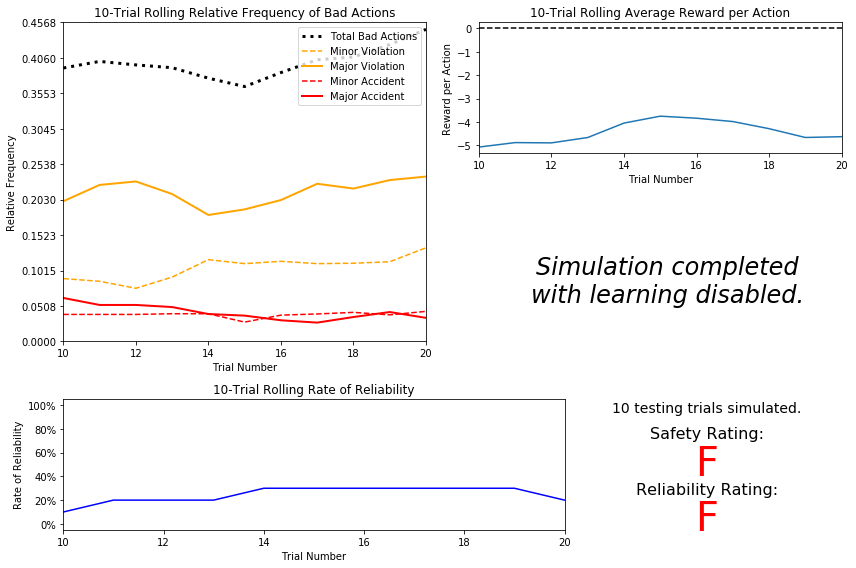

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** 

__**How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?**__

From all actions taken by the agent as the number of trials increases near the 45.70% of the actions are bad actions, this is the maximum of bad action. The minimum of bad actions is a 35.53% which happened when the system had 15 trials. From those bad actions near the 5.06% of them caused a minor accident and the 5.08% caused a major accident.

__**Given that the agent is driving randomly, does the rate of reliability make sense?**__

The maximum rate of reliability shown in the visualization is near 30% which makes sense since the agent is driving randomly. When an agent is driving randomly the random action it takes does not necessarily ends up in good actions, because it can crash with obstacles on the street or it can also get off the street and crash with a building and with people. Or it can take a route that has a traffic jam which will affect significantly the trip time. And if we add that the agent is also interacting with other agents on the street (agents that also can take random actions) the random action that the agent takes is tends more to become a bad action than a good one because you don't know which action the other agents are going to take (you may crash with another agent).

__**What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**__

The agent is receiving negative rewards for its actions. The rewards suggest that it has been penalized heavily because as I stated in the previous question, the agent is taking random actions while interacting with other agents, so without distinguishing the kind of actions that is happening through the streets the number of bad actions and penalties tend to increase. Also we just need to compare the reward per action visualization against the frecuency of bad actions visualization: we'll note that on the 10th and 20th trial where the rewards were the most negative, the number of minor and major violation increased, so with this we can infer that the agent was heavily penalized.

__**As the number of trials increases, does the outcome of results change significantly?**__

On the first visualization: the relative frecuency of bad actions as the number of trial increases some of the results change significantly, for example on the total bad actions plot it starts increasing and become stable on trial 12 but then starts decreasing slowly until trial 15, then it immediately starts increasing faster than before. Then the major violations plot does more or less the same. For the minor violation one it starts more or less stable and then from trial 12 to trial 14 increases, then stays stable until trial 19 and then starts increasing again. The Minor and Major accident plots stays more or less the same which don't have significant fluctuations. 

Then the rewards and reliability visualization don't show significant variations, they look more stable than the first visualization which has the most significant changes.


__**Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**__

It's neither safe nor reliable, because according to the results shown on the visualizations it is performing a high number of transit violations which will not only provoke accidents that put at risk the life of the passengers, but also, even if there's no accident at all, these violations increases the trip time becoming the agent unable to reach the destination on time.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

**For safety:** The intersection inputs because it allows you to know if there are any cars moving next to you either on right side or left side. Also let's you know if there's any vehicle coming on an intersection, as well as the current semaphore light. These input features are important to safety because it helps you to avoid accidents.

**For efficiency:** Waypoint is important for efficiency, because with the waypoint you can tell the smartcab in which direction it should drive so he can get the best route to arrive on time to the destination. Deadline is discarded because the agent will desperately take actions based on the remaining time which won't necessarily lead to reaching the destination on time and these will increase the tendency to commit mistakes that will impact also on safety.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** It would be of size 384 = waypoint(3 options) x light(2 options) x left(4 options) x right(4 options) x oncoming(4 options). The driving agent can learn a policy within a reasonable number of training trials, which could be more than 100 training trials. As the number of trial increase, the agent should take less random actions and more actions based on previosly learned mistakes. This is taking the action that gives the highest reward. Many other factors will also influence if the agent can have the reasonable number of training trials such as the decaying function and tolerance used.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

## Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

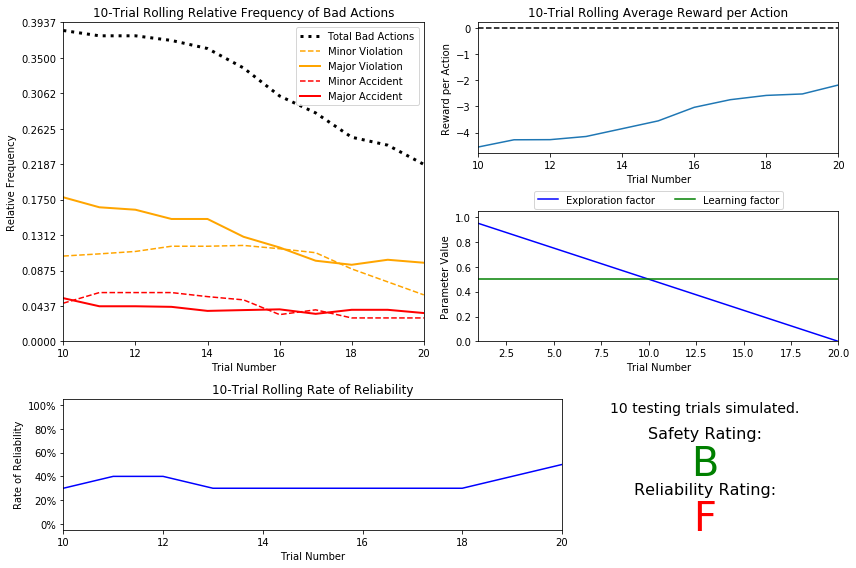

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

__*Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*__

- For the default Q-Learning agent after taking a look at the Frecuency of bad actions plot (10-trial) as the number of trials increased, the total bad actions started to decrease which means that at this point the Q-function started learning based on previous experiences (less random actions taken) and started to select better actions.

- On the default Q-Learning agent the major violations decreased, as the number of trials increased, compared to the basic driving agent. However, minor violation started to decrease, but it had a peak at trial 16 after that it started to have a decreasing pace as the number of trials increased.

- On the default Q-Learning agent, on average, number of major accidents stayed more or less the same compared to basic driving agent. On the minor accidents they are more or less the same as the basic driving agent but after trial 11 (on default Q-Learning agent) they have a peak and stay until trial 15, then they start to decrease until trial 16 and finally they start to fluctuate around the same value.

- In terms of reliablity rate, on average, it increased but not enough to get a high grade on this. On the basic driving agent it started near 20% then it slightly increased and at the end of the trials it slightly decreased. On Q-Learning agent it started increasing at 30% and after trial 11 it stayed constant (40%) and between trial 12 and 15 it decreased to 30%. In few words, compared to the basic driving agent it stayed the same (F), which means there's no guarantee that you'll arrive on time.

- On the average reward per action, on Q-Learning agent increased compared to the basic driving agent, since as the number of trials increased the agent started to receive more positive rewards than negative, which means that the agent is now learning from its mistakes.

__*Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*__

The driving agent required 20 training trials before changing to testing. It makes sense given the epsilon-tolerance, which is 0.05 by default, because the agent will change to testing when its epsilon is lower than the simulator tolerance. So if we're decaying the agent's epsilon (which is 1 by default) 20 times by 0.05, it will be decayed 1 in total, which means the agent's epsilon will be 0 so it will automatically change to testing mode.

__*Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*__

Yes it is. As the number of training trials increases, epsilon is decreasing so on trial 20 it goes to 0. And also the decaying function is a linear function and the exploration factor plot reflects that: a linear plot.

__*As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*__

After taking a look at the Q-Learning driving agent plots the number of bad actions did decrease as the number of training trials increased. The average reward also increased, this means that the agent is taking better decisions by using what it has learned before.

__*How does the safety and reliability rating compare to the initial driving agent?*__

In the Q-Learning agent safety improved dramatically, it's now qualified as B unlike the initial driving agent which was qualified as F. Reliability stayed the same, graded as F.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

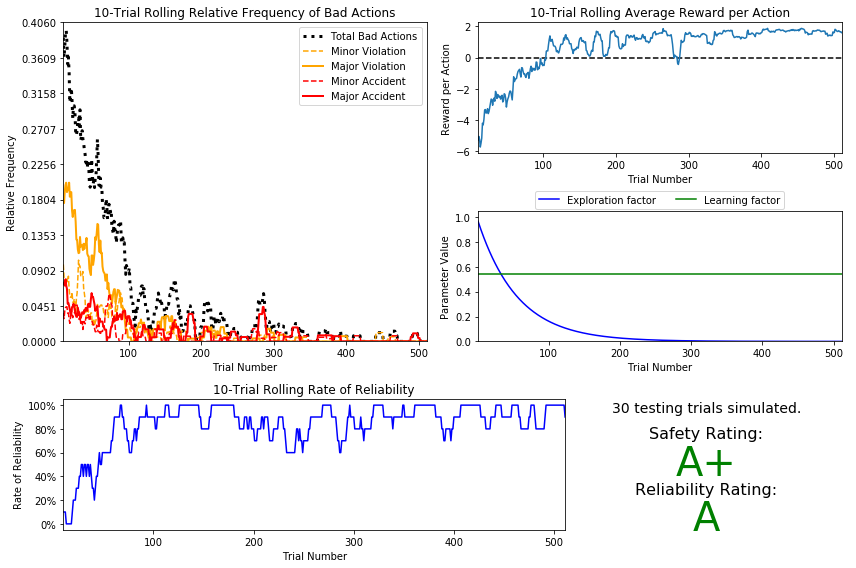

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- The decaying function used for epsilon was \epsilon = e^{-at} where a = 0.018.

- There were 511 training trials needed for the improved agent before begining testing.

- The epsilon tolerance I used was 0.0001 and an alpha value of 0.54. I used that tolerance value because since I was using an exponential decaying function (which decays slowly over time) it allows me to have more training trials so the agent can learn more from its experience and drive better.

- From the Safety standpoint a slight improvement was made since the previous default Q-Learner got a B on Safety and the improved one got an A+, a big step forward in safety. From the Reliability standpoint another big step forward was made since the Q-Learner jumped from C to A. This was thanks to the right choice of parameters to build the states, the increase of the training trials and the exponential decay function which also influenced on the increase of training trials.

- The Q-Learner results show that my driving agent learned an appropiate policy because since it gets an A+ on safety it means that it commits no traffic violations which if we compared to a human driver, it is better because despite we always respect the traffic laws and signs ocasionally we can commit some minor violation due to random circumstances that can come up. The same applies on reliability: due to random circumstances that can ocasionally show up we cannot guarantee that we will arrive to the destionation on time for the 100% of the trips, but at least we can do it the 90% of the trips. Overall, even if it is an autonomous system it isn't a perfect system, it will commit mistakes and the more it learns the less the rate of mistakes it will commit.

- Due to the non-perfect nature of the Q-Learning agent I mentioned in the previous question, I'm satisified with the safety and reliability ratings of the Smartcab.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

- Based on the environment we have and the right of way US traffic laws if the smartcab arrives to a controlled intersection (with semaphores in this case) the smartcab must respect the signs. At "T" intersections vehicles on the through road have the right of way. When another vehicle reaches an intersection first, the agent must yield the right of way to that vehicle and when the smartcab is making a turn and other vehicle is going straight (ex. {'right', 'red', 'right', 'forward', None}), the smartcab yields the right of way to the other vehicle.

- For various states the policy is the correct one, however, there are some states that are different than what would be expected from an optimal policy.

- Here are 2 examples where the optimal policy was learned by the smartcab:

**('left', 'red', None, 'right', 'left') = {None: 1.96, forward: 0.00, left: 0.00, right: 0.00}**. On this particular state the smartcab waypoint is to go left, however, there's a red light that the smartcab must respect so doing nothing (None) gives the maximum reward which is 1.96. The minimum reward is 0.00 for the rest of the parameters, since violating the red light implies in a possible accident since we have traffic from both left and right.


**('right', 'red', None, 'forward', None) = {None: 1.17, forward: -21.39, left: -31.55, right: -18.31}**. On this other state these values represent the correct policy because, the smartcab which intends to turn right but has a red light, can't do it not only because it has to respect the semaphore, but also (if it would turn right anyway) because since it is in an intersection and there's a car coming from its left, it must yield the right of way to that car which is going forward. So the best action to take is doing nothing until the semaphore lights turns green.

- Here's an example where the smartcab didn't learn the optimal policy:

**('left', 'green', 'right', None, 'left') = {None: 0.00, forward: 0.00, left: 0.00, right: 1.02}**. On this case, we have green light and the smartcab wants to turn left. However, incoming traffic wants to turn right, the right action would be None since we must wait for the intersection to clear, but the Q Value for None is 0.00, the highest value is to turn right which is 1.02 but we don't want to turn right. So None should have the highest Q value for this state.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

- The first characteristic that is related to the smartcab, is that our smartcab simply can't sense future inputs, it just can sense the current inputs that the environment gives to it and based on them build the current state on which it's in. This is also because the agent doesn't have a full view of the grid, only a little view of it which includes the semaphore lights, the oncoming traffic and the traffic at its sides.

- The second characteristic which is related to the environment is that the environment is not deterministic, is stochastic, so each event that occurs on the environment has a probability to occur based on what's happening at a certain moment. It doesn't work like a formula where you can give some inputs and based on that it can give you a definite value on the future. It will actually depend on what is the probability of a certain event to happen. Also the environment resets randomly which means that the patterns needed to anticipate what will happen next will disappear, therefore, we can't discount their values.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.